In [19]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import arch as arch
from pathlib import Path
%matplotlib inline

In [20]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/GSPC.csv')
sp500 = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-01-02,740.739990,742.809998,729.549988,737.010010,737.010010,463230000
1997-01-03,737.010010,748.239990,737.010010,748.030029,748.030029,452970000
1997-01-06,748.030029,753.309998,743.820007,747.650024,747.650024,531350000
1997-01-07,747.650024,753.260010,742.179993,753.229980,753.229980,538220000
1997-01-08,753.229980,755.719971,747.710022,748.409973,748.409973,557510000


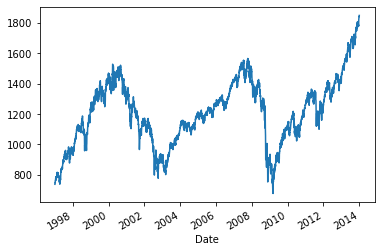

In [21]:
# Plot close data
sp500.Close.plot()

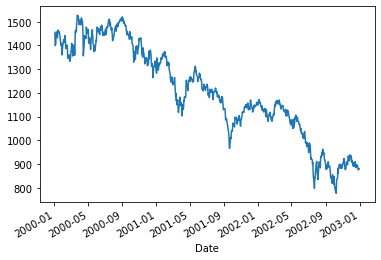

In [22]:
# September 11th attack, bursting of dot-com bubble
sp500.loc['2000':'2002'].Close.plot()

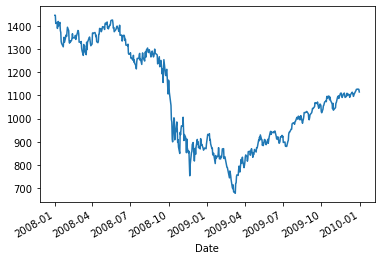

In [23]:
# Plot close data from 2008 to 2009
sp500.loc['2008':'2009'].Close.plot()

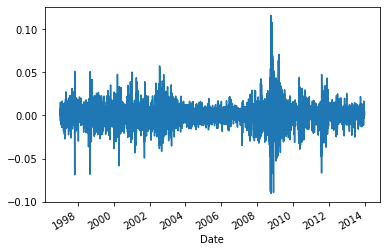

In [24]:
# GARCH assumes stationarity
# Clustering of volatility seen, e.g. 2008-2010
sp500['Close'].pct_change().plot()

In [27]:
# Focus on the 2008-2009 Financial Crisis Period
returns = sp500.loc['2008':'2009'].Close.pct_change() * 100
returns = returns.dropna()
returns.tail()

Date
2009-12-24    0.525617
2009-12-28    0.115408
2009-12-29   -0.140105
2009-12-30    0.019543
2009-12-31   -1.004960
Name: Close, dtype: float64

# GARCH

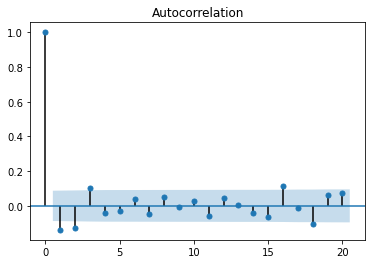

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(returns, lags=20);

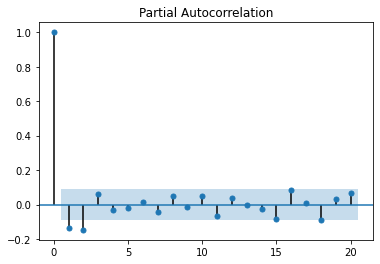

In [29]:
plot_pacf(returns, lags=20);

In [52]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
from arch import arch_model
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)

In [53]:
# Fit the GARCH Model
res = model.fit(disp="off")

In [54]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -991.155
Distribution:                  Normal   AIC:                           1988.31
Method:            Maximum Likelihood   BIC:                           2000.98
                                        No. Observations:                  504
Date:                Sat, Aug 08 2020   Df Residuals:                      501
Time:                        12:52:52   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0255  2.268e-02      1.124      0.261 [-1.895e-02,6.993e-02]
alpha[1]       0.0986  2.185e-02      4.512  6.420e-06    [5.577e-02,  0.141]
beta[1]        0.8968  1.882e-02     47.650      0.000      [  0.860,  0.934]
=============================================================================

Covariance estimator: robust
"""

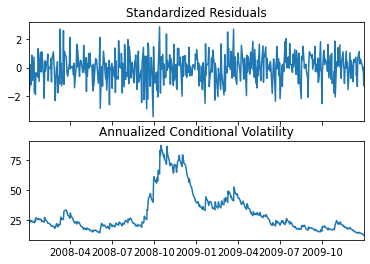

In [13]:
# Plot the model estimate of annualized volatility
fig = res.plot(annualize='D')

# Forecasting from GARCH

In [59]:
# Construct Volatility Forecasts for the next 3 days
forecast_horizon = 3
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = res.forecast(start='2009-12-31', horizon=forecast_horizon)
forecasts

In [60]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3
Date,,,
2009-12-31,13.007879,13.223021,13.43375


# Visualizing the forecast

In [65]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

Date,2009-12-31
h.1,13.007879
h.2,13.223021
h.3,13.433750


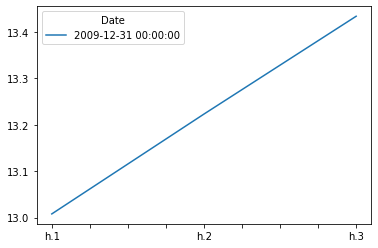

In [62]:
# Plot the forecast
final.plot()